# ★3시간 후 예측



In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import matplotlib.pyplot as plt

In [ ]:
from keras.models import Model
from keras.layers import Input, LSTM, Dense, concatenate
from sklearn.model_selection import train_test_split
from keras.models import load_model
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten
from tensorflow.keras.layers import Concatenate

# 데이터로드

In [ ]:
df1 = pd.read_csv('21-01-01~22-12-31강진면.csv')

In [ ]:
df2 = pd.read_csv('21-01-01~22-12-31신덕.csv')

In [ ]:
df3 = pd.read_csv('21-01-01~22-12-31곡성.csv')

In [ ]:
w_df = pd.read_csv('가탄교수위.csv')

In [ ]:
print(df1.shape)
print(df2.shape)
print(df3.shape)
print(w_df.shape)

(17520, 10)
(17520, 10)
(17520, 10)
(17523, 2)


In [ ]:
w_df = w_df.loc[49:]

In [ ]:
w_df = w_df[:-1]

In [ ]:
w_df

,일시,수위
49,2021-01-03 02:00,0.6
50,2021-01-03 03:00,0.6
51,2021-01-03 04:00,0.6
52,2021-01-03 05:00,0.6
53,2021-01-03 06:00,0.6
...,...,...
17517,2022-12-31 22:00,0.6
17518,2022-12-31 23:00,0.6
17519,2022-12-31 24:00,0.6
17520,2023-01-01 01:00,0.6


# 데이터 전처리

In [ ]:
features = ['기온(°C)', '풍향(deg)', '풍속(m/s)', '강수량(mm)', '습도(%)']

In [ ]:
test_df1 = df1[features].values
test_df2 = df2[features].values
test_df3 = df3[features].values

In [ ]:
test_wdf = w_df[["수위"]].values

In [ ]:
print(test_df1.shape)
print(test_df2.shape)
print(test_df3.shape)
print(test_wdf.shape)

(17520, 5)
(17520, 5)
(17520, 5)
(17473, 1)


In [ ]:
test_df3

array([[-2.900e+00,  2.320e+01,  1.900e+00,  0.000e+00,  7.300e+01],
       [-5.000e+00,  5.700e+00,  1.400e+00,  0.000e+00,  7.500e+01],
       [-7.100e+00,  3.377e+02,  1.000e+00,  0.000e+00,  8.400e+01],
       ...,
       [-2.900e+00,  3.448e+02,  1.000e+00,  0.000e+00,  8.800e+01],
       [-3.300e+00,  2.053e+02,  1.100e+00,  0.000e+00,  9.000e+01],
       [-4.500e+00,  0.000e+00,  1.000e-01,  0.000e+00,  9.400e+01]])

## 정규화

In [ ]:
# 정규화
scaler = MinMaxScaler()

# 상류 하천 데이터 정규화
test_df1_z = scaler.fit_transform(test_df1)
test_df2_z = scaler.fit_transform(test_df2)
test_df3_z = scaler.fit_transform(test_df3)

In [ ]:
scaler_water = MinMaxScaler()
test_wdf_z = scaler_water.fit_transform(test_wdf)

In [ ]:
test_df1_z

array([[0.26987061, 0.69288703, 0.16666667, 0.        , 0.76744186],
       [0.23844732, 0.76596932, 0.10784314, 0.        , 0.87209302],
       [0.24214418, 0.83542538, 0.1372549 , 0.        , 0.86046512],
       ...,
       [0.30314233, 0.        , 0.00980392, 0.        , 0.94186047],
       [0.29759704, 0.        , 0.00980392, 0.        , 0.94186047],
       [0.2754159 , 0.19414226, 0.06862745, 0.        , 0.97674419]])

In [ ]:
test_wdf_z

array([[0.05668016],
       [0.05668016],
       [0.05668016],
       ...,
       [0.05668016],
       [0.05668016],
       [0.05668016]])

In [ ]:
print(test_df1_z.shape)
print(test_df2_z.shape)
print(test_df3_z.shape)
print(test_wdf_z.shape)

(17520, 5)
(17520, 5)
(17520, 5)
(17473, 1)


## 차원변환

In [ ]:
test_df1_z = test_df1
test_df2_z = test_df2
test_df3_z = test_df3
test_wdf_z = test_wdf

In [ ]:
test_wdf_z

array([[0.6],
       [0.6],
       [0.6],
       ...,
       [0.6],
       [0.6],
       [0.6]])

- 강진면

In [ ]:
time_steps = 48

new_data = []

for i in range(len(test_df1_z) - time_steps + 1):
    batch = test_df1_z[i:i+time_steps]
    new_data.append(batch)

test_df1_re = np.array(new_data)

In [ ]:
test_df1_re

In [ ]:
test_df1_re.shape

(17473, 48, 5)

- 신덕

In [ ]:
new_data = []

for i in range(len(test_df2_z) - time_steps + 1):
    batch = test_df2_z[i:i+time_steps]
    new_data.append(batch)

test_df2_re = np.array(new_data)

In [ ]:
test_df2_re.shape

(17473, 48, 5)

- 곡성

In [ ]:
new_data = []

for i in range(len(test_df3_z) - time_steps + 1):
    batch = test_df3_z[i:i+time_steps]
    new_data.append(batch)

test_df3_re = np.array(new_data)

In [ ]:
test_df3_re.shape

(17473, 48, 5)

In [ ]:
print("NumPy array dtype:", test_df2_re.dtype)

NumPy array dtype: float64


- 수위

In [ ]:
test_wdf_z.shape  # 위에서 변경함

(17473, 1)

# 모델

- CNN_Lstm

In [ ]:
num_top = 3  # 상류 하천의 수
time_steps = 48
# 모델의 입력 레이어 정의
input_layers = []
input_shape = (time_steps, 5)
for i in range(num_top):
    input_layer = Input(shape=input_shape, name=f'aws_{i+1}')
    input_layers.append(input_layer)

# CNN 레이어 정의
cnn_layers = []
for i in range(num_top):
    cnn_layer = Conv1D(filters=64, kernel_size=3, activation='relu')(input_layers[i])
    cnn_layer = MaxPooling1D(pool_size=2)(cnn_layer)
    cnn_layer = Flatten()(cnn_layer)
    cnn_layers.append(cnn_layer)

concatenated_outputs = Concatenate()(cnn_layers)
lstm_input = tf.keras.layers.Reshape((num_top, -1))(concatenated_outputs)  # LSTM에 입력하기 위해 차원 재구성


lstm_layer = LSTM(32, activation='relu')(lstm_input)

output_layer = Dense(1, activation='linear', name='water')(lstm_layer)

In [ ]:
# 모델 컴파일
model = Model(inputs=input_layers, outputs=output_layer)
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 aws_1 (InputLayer)          [(None, 48, 5)]              0         []                            
                                                                                                  
 aws_2 (InputLayer)          [(None, 48, 5)]              0         []                            
                                                                                                  
 aws_3 (InputLayer)          [(None, 48, 5)]              0         []                            
                                                                                                  
 conv1d_3 (Conv1D)           (None, 46, 64)               1024      ['aws_1[0][0]']               
                                                                                            

# 학습

In [ ]:
from keras.callbacks import EarlyStopping, ModelCheckpoint
callback = EarlyStopping( monitor='loss',
                          patience = 50,
                          verbose = 2,
                          restore_best_weights = True)

In [ ]:
model.fit([test_df1_re, test_df2_re, test_df3_re], test_wdf_z, epochs=1000, batch_size=32, callbacks = [callback])

Epoch 1/1000
547/547 [==============================] - 11s 16ms/step - loss: 5.9737 - mae: 0.3519
Epoch 2/1000
547/547 [==============================] - 9s 16ms/step - loss: 0.0351 - mae: 0.1301
Epoch 3/1000
547/547 [==============================] - 8s 14ms/step - loss: 0.0317 - mae: 0.1234
Epoch 4/1000
547/547 [==============================] - 9s 16ms/step - loss: 0.0295 - mae: 0.1186
Epoch 5/1000
547/547 [==============================] - 8s 14ms/step - loss: 0.0275 - mae: 0.1148
Epoch 6/1000
547/547 [==============================] - 8s 15ms/step - loss: 0.0255 - mae: 0.1100
Epoch 7/1000
547/547 [==============================] - 9s 17ms/step - loss: 0.0250 - mae: 0.1085
Epoch 8/1000
547/547 [==============================] - 7s 13ms/step - loss: 0.0238 - mae: 0.1050
Epoch 9/1000
547/547 [==============================] - 9s 16ms/step - loss: 0.0237 - mae: 0.1048
Epoch 10/1000
547/547 [==============================] - 9s 16ms/step - loss: 0.0226 - mae: 0.1020
Epoch 11/1000
547/

# 결과

In [ ]:
predictions = model.predict([test_df1_re, test_df2_re, test_df3_re])

547/547 [==============================] - 4s 7ms/step


In [ ]:
predictions_scale = scaler_water.inverse_transform(predictions)

In [ ]:
predictions_scale.shape

(17473, 1)

In [ ]:
predictions_scale

array([[0.6999405],
       [0.6999405],
       [0.6999405],
       ...,
       [0.6999405],
       [0.6999405],
       [0.6999405]], dtype=float32)

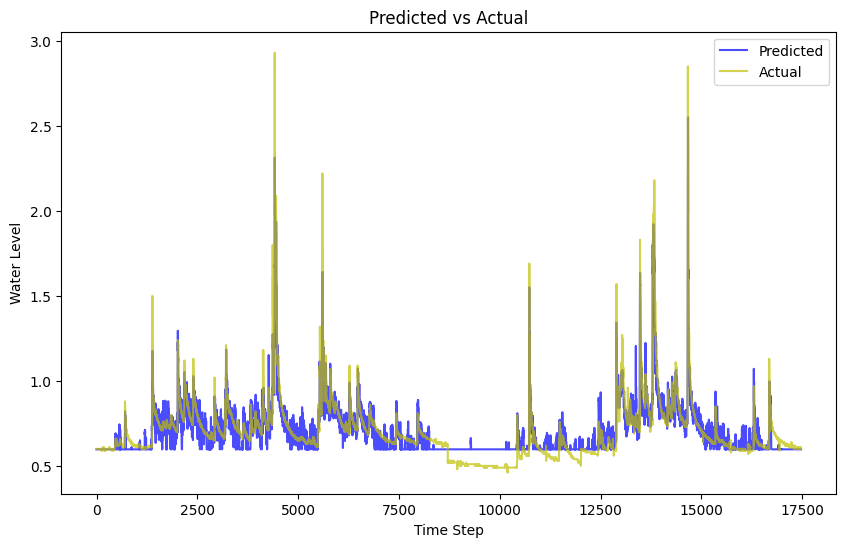

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

plt.plot(predictions_scale, label='Predicted', color = 'b', alpha=0.7)
plt.plot(test_wdf, label='Actual', color = 'y', alpha=0.7)

plt.xlabel('Time Step')
plt.ylabel('Water Level')
plt.title('Predicted vs Actual')
plt.legend()
plt.show()

In [ ]:
predictions_scale[:10]

array([[0.59753716],
       [0.59753716],
       [0.59753716],
       [0.59753716],
       [0.59753716],
       [0.59753716],
       [0.59753716],
       [0.59753716],
       [0.59753716],
       [0.59753716]], dtype=float32)

- 모델저장

In [ ]:
model.save("model_48_cnn.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
from pickle import dump

dump(scaler, open('./48_cnn_scaler.pkl', 'wb'))

In [ ]:
dump(scaler_water, open('./48_cnn_water_scaler.pkl', 'wb'))

# 모델 테스트

In [ ]:
t1 = pd.read_csv('11111.csv')

In [ ]:
t2 = pd.read_csv('22222.csv')

In [ ]:
t3 = pd.read_csv('33333.csv')

In [ ]:
tw = pd.read_csv('test수위48.csv')

In [ ]:
test_w = tw[["수위"]].values

In [ ]:
from keras.models import load_model

model_filename = 'model_48_cnn.h5'

loaded_model = load_model(model_filename)

In [ ]:
from pickle import load

load_minmax_scaler = load(open('48_cnn_scaler.pkl', 'rb'))

In [ ]:
load_minmax_scaler_water = load(open('48_cnn_water_scaler.pkl', 'rb'))

## 데이터 전처리

In [ ]:
features = ['기온(°C)', '풍향(deg)', '풍속(m/s)', '강수량(mm)', '습도(%)']

In [ ]:
test_t1 = t1[features].values
test_t2 = t2[features].values
test_t3 = t3[features].values

### 정규화

In [ ]:
# 상류 하천 데이터 정규화
test_df1_z = load_minmax_scaler.fit_transform(test_t1)
test_df2_z = load_minmax_scaler.fit_transform(test_t2)
test_df3_z = load_minmax_scaler.fit_transform(test_t3)

In [ ]:
time_steps = 48

new_data = []

for i in range(len(test_df1_z) - time_steps + 1):
    batch = test_df1_z[i:i+time_steps]
    new_data.append(batch)

test_df1_re = np.array(new_data)

In [ ]:
test_df1_re.shape

(25, 48, 5)

In [ ]:
new_data = []

for i in range(len(test_df2_z) - time_steps + 1):
    batch = test_df2_z[i:i+time_steps]
    new_data.append(batch)

test_df2_re = np.array(new_data)

In [ ]:
new_data = []

for i in range(len(test_df3_z) - time_steps + 1):
    batch = test_df3_z[i:i+time_steps]
    new_data.append(batch)

test_df3_re = np.array(new_data)

### 결과

In [ ]:
predictions = loaded_model.predict([test_df1_re, test_df2_re, test_df3_re])

1/1 [==============================] - 0s 282ms/step


In [ ]:
predictions

In [ ]:
predictions_scaler = load_minmax_scaler_water.inverse_transform(predictions)

In [ ]:
predictions_scaler

array([[0.66359544],
       [0.6500345 ],
       [0.6744711 ],
       [0.6569511 ],
       [0.66976875],
       [0.65160793],
       [0.62916976],
       [0.6427949 ],
       [0.63147783],
       [0.6253056 ],
       [0.63690966],
       [0.61404973],
       [0.66987765],
       [0.64345396],
       [0.67464685],
       [0.64775395],
       [0.67617434],
       [0.6634609 ],
       [0.6790228 ],
       [0.6462176 ],
       [0.631968  ],
       [0.5978927 ],
       [0.6272656 ],
       [0.6266331 ],
       [0.6181421 ]], dtype=float32)

In [ ]:
predictions_scaler.shape

(25, 1)

In [ ]:
test_w

array([[0.66],
       [0.66],
       [0.66],
       [0.66],
       [0.66],
       [0.66],
       [0.66],
       [0.66],
       [0.66],
       [0.66],
       [0.66],
       [0.66],
       [0.66],
       [0.66],
       [0.66],
       [0.65],
       [0.65],
       [0.65],
       [0.65],
       [0.65],
       [0.65],
       [0.65],
       [0.65],
       [0.65],
       [0.65]])

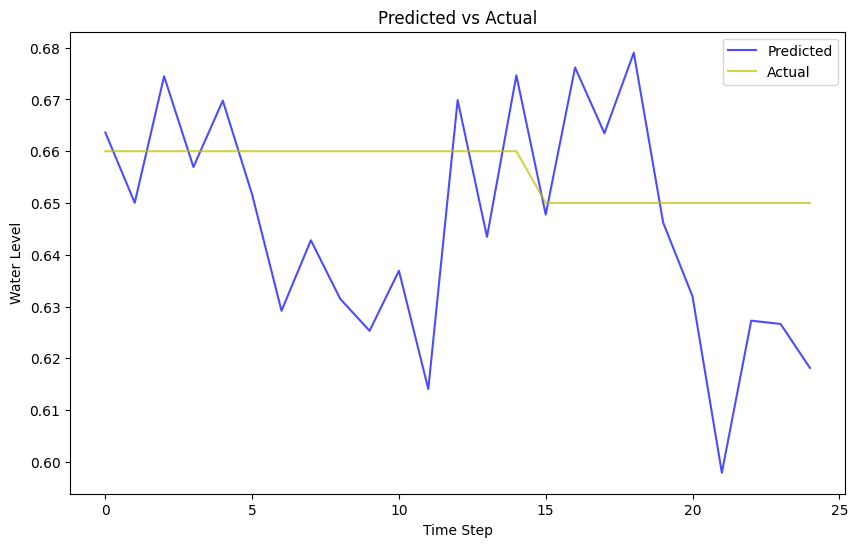

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

plt.plot(predictions_scaler, label='Predicted', color = 'b', alpha=0.7)
plt.plot(test_w, label='Actual', color = 'y', alpha=0.7)

plt.xlabel('Time Step')
plt.ylabel('Water Level')
plt.title('Predicted vs Actual')
plt.legend()
plt.show()

In [ ]:
# RMSE
rmse = np.sqrt(((predictions_scaler - test_w) ** 2).mean())

# MAE
mae = np.abs(predictions_scaler - test_w).mean()

print("RMSE:", rmse)
print("MAE:", mae)

RMSE: 0.023526219931157697
MAE: 0.01973558998107911


## 3시간 테스트
-> 27개의데이터

In [ ]:
t1 = pd.read_csv('test48-1.csv')

In [ ]:
t2 = pd.read_csv('test48-2.csv')

In [ ]:
t3 = pd.read_csv('test48-3.csv')

In [ ]:
features = ['기온(°C)', '풍향(deg)', '풍속(m/s)', '강수량(mm)', '습도(%)']

In [ ]:
t2

,지점,지점명,일시,기온(°C),풍향(deg),풍속(m/s),강수량(mm),현지기압(hPa),해면기압(hPa),습도(%)
0,764,신덕,2023-08-15 00:00,23.9,0.0,0.4,0.0,981.5,1005.2,98
1,764,신덕,2023-08-15 01:00,23.9,0.0,0.0,0.0,981.4,1005.1,98
2,764,신덕,2023-08-15 02:00,23.3,0.0,0.1,0.0,981.1,1004.9,99
3,764,신덕,2023-08-15 03:00,23.4,0.0,0.0,0.0,980.9,1004.7,99
4,764,신덕,2023-08-15 04:00,23.4,0.0,0.2,0.0,980.7,1004.5,99
...,...,...,...,...,...,...,...,...,...,...
69,764,신덕,2023-08-17 21:00,24.5,347.9,0.6,0.0,981.3,1005.2,96
70,764,신덕,2023-08-17 22:00,24.2,78.4,1.4,0.5,982.1,1005.8,93
71,764,신덕,2023-08-17 23:00,23.4,139.3,0.6,0.5,982.2,1006.0,98
72,764,신덕,2023-08-18 00:00,23.0,155.7,0.9,0.0,982.5,1006.4,98


In [ ]:
test_t1 = t1[features].values
test_t2 = t2[features].values
test_t3 = t3[features].values

In [ ]:
# 정규화
scaler = MinMaxScaler()

# 상류 하천 데이터 정규화
test_df1_z = scaler.fit_transform(test_t1)
test_df2_z = scaler.fit_transform(test_t2)
test_df3_z = scaler.fit_transform(test_t3)

In [ ]:
time_steps = 48

new_data = []

for i in range(len(test_df1_z) - time_steps + 1):
    batch = test_df1_z[i:i+time_steps]
    new_data.append(batch)

test_df1_re = np.array(new_data)

In [ ]:
new_data = []

for i in range(len(test_df2_z) - time_steps + 1):
    batch = test_df2_z[i:i+time_steps]
    new_data.append(batch)

test_df2_re = np.array(new_data)

In [ ]:
new_data = []

for i in range(len(test_df3_z) - time_steps + 1):
    batch = test_df3_z[i:i+time_steps]
    new_data.append(batch)

test_df3_re = np.array(new_data)

In [ ]:
test_df3_re.shape

(27, 48, 5)

In [ ]:
test_df3_re

In [ ]:
predictions_t3 = loaded_model.predict([test_df1_re, test_df2_re, test_df3_re])

ValueError: ignored

In [ ]:
predictions_scaler_3 = load_minmax_scaler.inverse_transform(predictions_t3)

In [ ]:
predictions_scaler_3

array([[0.5297551],
       [0.6250757],
       [0.6465651]], dtype=float32)

In [ ]:
tw1 = pd.read_csv('test수위48-1.csv')

In [ ]:
test_w = tw1[["수위"]].values

In [ ]:
test_w

array([[0.66],
       [0.66],
       [0.66]])

In [ ]:
# RMSE
rmse = np.sqrt(((predictions_scaler_3 - test_w) ** 2).mean())

# MAE
mae = np.abs(predictions_scaler_3 - test_w).mean()

print("RMSE:", rmse)
print("MAE:", mae)

RMSE: 0.07823880941723418
MAE: 0.05953470230102542


In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

plt.plot(predictions_scaler_3, label='Predicted', color = 'b', alpha=0.7)
plt.plot(test_w, label='Actual', color = 'y', alpha=0.7)

plt.xlabel('Time Step')
plt.ylabel('Water Level')
plt.title('Predicted vs Actual')
plt.legend()
plt.show()

In [ ]:
predictions_scaler_3

array([[0.5297551],
       [0.6250757],
       [0.646565 ]])

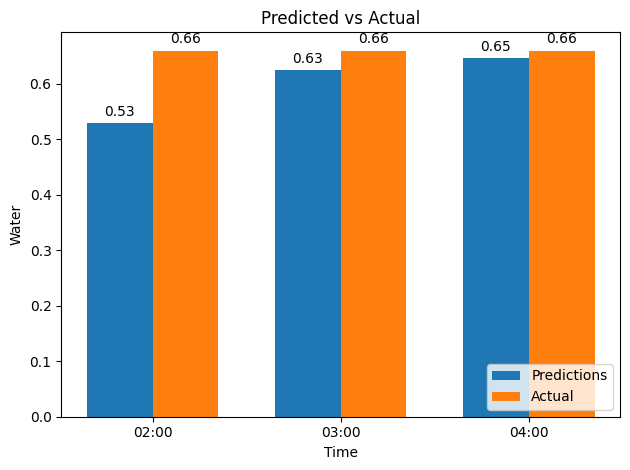

In [ ]:
# 데이터 포인트 레이블
data_labels = ['02:00', '03:00', '04:00']

# 그래프 데이터
x = np.arange(len(data_labels))
width = 0.35

# 예측값과 실제값 막대 그래프 생성
fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, predictions_scaler_3.flatten(), width, label='Predictions')
rects2 = ax.bar(x + width/2, test_w.flatten(), width, label='Actual')

# 레이블과 범례 설정
ax.set_xlabel('Time')
ax.set_ylabel('Water')
ax.set_title('Predicted vs Actual')
ax.set_xticks(x)
ax.set_xticklabels(data_labels)
ax.legend()

ax.legend(loc='lower right')

# 막대 위에 값 표시
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.2f}', xy=(rect.get_x() + rect.get_width() / 2, height), xytext=(0, 3),
                    textcoords="offset points", ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

plt.tight_layout()
plt.show()

#### 72 테스트(48과는 무관)

In [ ]:
TEST = pd.read_csv('test72-1.csv')

In [ ]:
# 결측치를 위 아래 값의 평균값으로
def fill_with_mean(df, row, column):
    # if pd.notna(row[column]):
    #     return row[column]

    prev_row = df.iloc[row-1]
    next_row = df.iloc[row+1]

    prev_value = prev_row[column] if pd.notna(prev_row[column]) else 0
    next_value = next_row[column] if pd.notna(next_row[column]) else 0

    return (prev_value + next_value) / 2

In [ ]:
row = 7
df = TEST
TEST.loc[row, '기온(°C)'] = fill_with_mean(df,row,'기온(°C)')
TEST.loc[row, '풍향(deg)'] = fill_with_mean(df,row,'풍향(deg)')
TEST.loc[row, '풍속(m/s)'] = fill_with_mean(df,row,'풍속(m/s)')
TEST.loc[row, '현지기압(hPa)'] = fill_with_mean(df,row,'현지기압(hPa)')
TEST.loc[row, '해면기압(hPa)'] = fill_with_mean(df,row,'해면기압(hPa)')
TEST.loc[row, '습도(%)'] = fill_with_mean(df,row,'습도(%)')

In [ ]:
TEST[:10]

,지점,지점명,일시,기온(°C),풍향(deg),풍속(m/s),강수량(mm),현지기압(hPa),해면기압(hPa),습도(%)
0,762,강진면,2023-08-15 00:00,23.60,279.6,0.8,0,986.3,1004.90,99.0
1,762,강진면,2023-08-15 01:00,23.40,0.0,0.0,0,986.3,1004.90,100.0
2,762,강진면,2023-08-15 02:00,23.70,303.1,1.0,0,986.0,1004.60,99.0
3,762,강진면,2023-08-15 03:00,23.40,53.0,1.5,0,985.7,1004.30,100.0
4,762,강진면,2023-08-15 04:00,23.50,0.0,0.1,0,985.6,1004.20,100.0
5,762,강진면,2023-08-15 05:00,23.60,0.0,0.0,0,985.6,1004.20,100.0
6,762,강진면,2023-08-15 06:00,23.30,70.3,1.0,0,986.1,1004.70,100.0
7,762,강진면,2023-08-15 07:00,25.85,138.8,1.4,0,986.1,1004.55,90.0
8,762,강진면,2023-08-15 10:00,28.40,207.3,1.8,0,986.1,1004.40,80.0
9,762,강진면,2023-08-15 11:00,30.20,248.6,2.1,0,985.3,1003.60,72.0


In [ ]:
TEST.to_csv('test72-1.csv')

# 2023 테스트

In [ ]:
t1 = pd.read_csv('강진면.csv')

In [ ]:
t2 = pd.read_csv('신덕.csv')

In [ ]:
t3 = pd.read_csv('곡성.csv')

In [ ]:
t1

,지점,지점명,일시,기온(°C),풍향(deg),풍속(m/s),강수량(mm),현지기압(hPa),해면기압(hPa),습도(%)
0,762,강진면,2023-01-01 00:00,-5.7,75.0,0.8,0.0,1010.7,1032.2,97.0
1,762,강진면,2023-01-01 01:00,-6.0,74.0,1.0,0.0,1010.4,1031.9,98.0
2,762,강진면,2023-01-01 02:00,-6.3,76.5,1.5,0.0,1010.2,1031.7,97.0
3,762,강진면,2023-01-01 03:00,-6.9,90.5,1.0,0.0,1010.3,1031.9,96.0
4,762,강진면,2023-01-01 04:00,-7.2,73.4,0.5,0.0,1009.9,1031.5,96.0
...,...,...,...,...,...,...,...,...,...,...
6115,762,강진면,2023-09-12 19:00,22.5,255.7,2.1,0.0,990.2,1009.0,89.0
6116,762,강진면,2023-09-12 20:00,21.5,279.3,1.5,0.0,991.2,1010.1,93.0
6117,762,강진면,2023-09-12 21:00,21.2,278.0,1.5,0.0,991.9,1010.9,94.0
6118,762,강진면,2023-09-12 22:00,21.3,255.0,1.4,0.0,992.1,1011.1,95.0


In [ ]:
from keras.models import load_model

model_filename = 'model_48_cnn.h5'

loaded_model = load_model(model_filename)

In [ ]:
from pickle import load

load_minmax_scaler = load(open('48_cnn_scaler.pkl', 'rb'))

In [ ]:
load_minmax_scaler_water = load(open('48_cnn_water_scaler.pkl', 'rb'))



---



In [ ]:
tw = pd.read_csv('가탄교수위48.csv')

In [ ]:
test_w = tw[["수위"]].values

## 데이터 전처리

In [ ]:
features = ['기온(°C)', '풍향(deg)', '풍속(m/s)', '강수량(mm)', '습도(%)']

In [ ]:
test_t1 = t1[features].values
test_t2 = t2[features].values
test_t3 = t3[features].values

In [ ]:
test_df1_z = test_t1
test_df2_z = test_t2
test_df3_z = test_t3

### 정규화

In [ ]:
# 상류 하천 데이터 정규화
test_df1_z = load_minmax_scaler.fit_transform(test_t1)
test_df2_z = load_minmax_scaler.fit_transform(test_t2)
test_df3_z = load_minmax_scaler.fit_transform(test_t3)

In [ ]:
time_steps = 48

new_data = []

for i in range(len(test_df1_z) - time_steps + 1):
    batch = test_df1_z[i:i+time_steps]
    new_data.append(batch)

test_df1_re = np.array(new_data)

In [ ]:
test_df1_re.shape

(6073, 48, 5)

In [ ]:
new_data = []

for i in range(len(test_df2_z) - time_steps + 1):
    batch = test_df2_z[i:i+time_steps]
    new_data.append(batch)

test_df2_re = np.array(new_data)

In [ ]:
new_data = []

for i in range(len(test_df3_z) - time_steps + 1):
    batch = test_df3_z[i:i+time_steps]
    new_data.append(batch)

test_df3_re = np.array(new_data)

### 결과

In [ ]:
predictions = loaded_model.predict([test_df1_re, test_df2_re, test_df3_re])

190/190 [==============================] - 1s 5ms/step


In [ ]:
predictions

array([[0.59753716],
       [0.59753716],
       [0.59753716],
       ...,
       [0.73778194],
       [0.7039182 ],
       [0.7323178 ]], dtype=float32)

In [ ]:
predictions_scaler = load_minmax_scaler_water.inverse_transform(predictions)

In [ ]:
predictions_scaler

array([[0.5445759 ],
       [0.56593   ],
       [0.55068153],
       ...,
       [0.76530606],
       [0.7383812 ],
       [0.71843237]], dtype=float32)

In [ ]:
predictions_scaler.shape

(6073, 1)

In [ ]:
test_w

array([[0.6 ],
       [0.6 ],
       [0.6 ],
       ...,
       [0.63],
       [0.63],
       [0.63]])

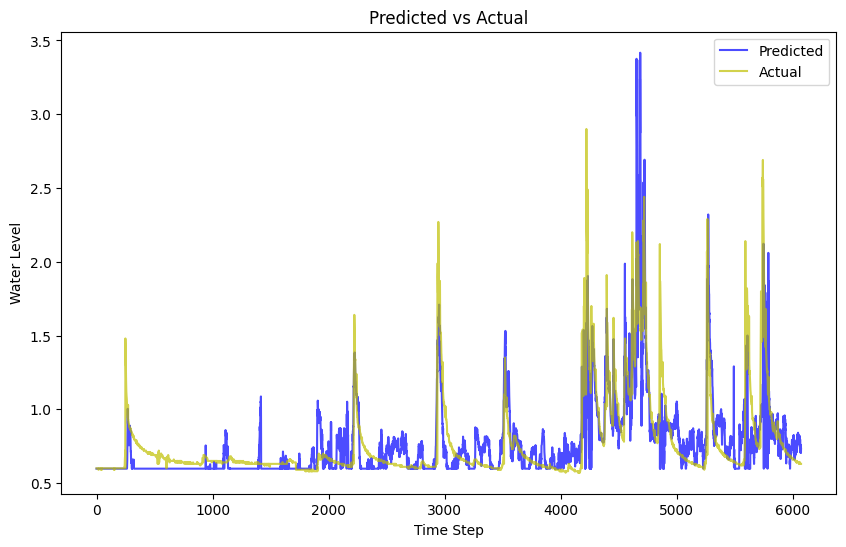

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

plt.plot(predictions_scaler, label='Predicted', color = 'b', alpha=0.7)
plt.plot(test_w, label='Actual', color = 'y', alpha=0.7)

plt.xlabel('Time Step')
plt.ylabel('Water Level')
plt.title('Predicted vs Actual')
plt.legend()
plt.show()

In [ ]:
# RMSE
rmse = np.sqrt(((predictions_scaler - test_w) ** 2).mean())

# MAE
mae = np.abs(predictions_scaler - test_w).mean()

print("RMSE:", rmse)
print("MAE:", mae)

RMSE: 0.16487657497023547
MAE: 0.10629769117322212
